Import libraries

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer, models
from transformers import AutoModel, AutoConfig
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
import torch

Set base output dir (hint, use `pwd`)

In [5]:
output_dir = "/cs/student/projects1/2021/cbarber/Enhancing-Idiomatic-Representation-in-Multiple-Languages"

Load model

In [ ]:
model_path = output_dir + "/model/sentence-transformers/paraphrase-multilingual-mpnet-base-v2/0/checkpoint-3360" 

config = AutoConfig.from_pretrained(model_path)

auto_model = AutoModel.from_pretrained(model_path, config=config)

In [29]:
word_embedding_model = models.Transformer(model_path)

In [31]:
# Create a pooling model
pooling_model = models.Pooling(
    word_embedding_model.get_word_embedding_dimension(),
    pooling_mode_mean_tokens=True
)

# Combine them into a SentenceTransformer model
model = SentenceTransformer(modules=[word_embedding_model, pooling_model])

Define example sentences  

In [32]:
idiom_examples = [
    # Format: (sentence with idiom, correct paraphrase, literal interpretation)
    ("She kicked the bucket last year.", "She died last year.", "She kicked a bucket last year."),
    ("It's raining cats and dogs.", "It's raining heavily.", "Cats and dogs are falling from the sky."),
    # Add more examples here
]

Calculate and visualise similarities

Idiom: She kicked the bucket last year.
Correct paraphrase: She died last year.
Literal interpretation: She kicked a bucket last year.

Similarity matrix:
1 and 1: 1.0000
1 and 2: 0.5497
1 and 3: 0.8891
2 and 1: 0.5497
2 and 2: 1.0000
2 and 3: 0.4520
3 and 1: 0.8891
3 and 2: 0.4520
3 and 3: 1.0000
--------------------------------------------------------------------------------


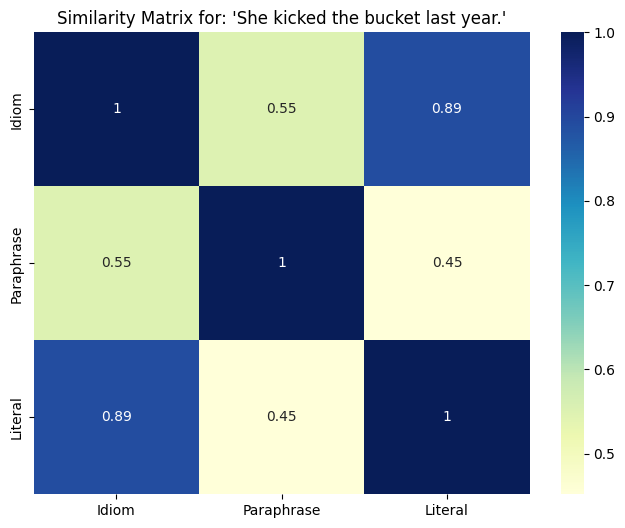

Idiom: It's raining cats and dogs.
Correct paraphrase: It's raining heavily.
Literal interpretation: Cats and dogs are falling from the sky.

Similarity matrix:
1 and 1: 1.0000
1 and 2: 0.7123
1 and 3: 0.7246
2 and 1: 0.7123
2 and 2: 1.0000
2 and 3: 0.3331
3 and 1: 0.7246
3 and 2: 0.3331
3 and 3: 1.0000
--------------------------------------------------------------------------------


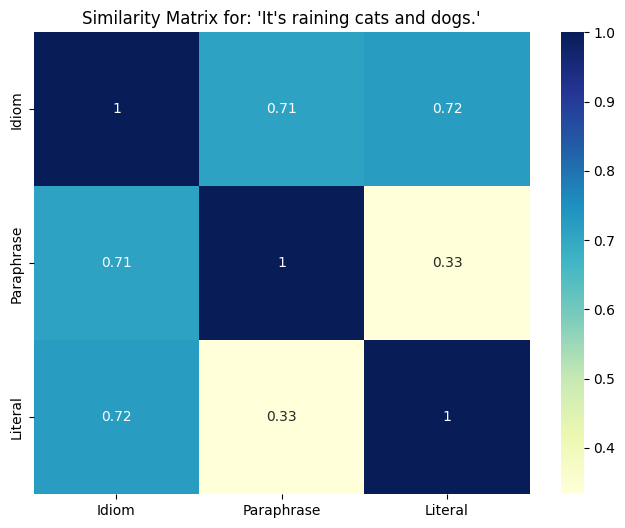

In [33]:
for idiom, paraphrase, literal in idiom_examples:
    sentences = [idiom, paraphrase, literal]
    embeddings = model.encode(sentences)
    similarities = cosine_similarity(embeddings)
    
    print(f"Idiom: {idiom}")
    print(f"Correct paraphrase: {paraphrase}")
    print(f"Literal interpretation: {literal}")
    print("\nSimilarity matrix:")
    for i, s1 in enumerate(sentences):
        for j, s2 in enumerate(sentences):
            print(f"{i+1} and {j+1}: {similarities[i][j]:.4f}")
    print("-" * 80)
    
    # Visualize with a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(similarities, annot=True, cmap="YlGnBu", 
                xticklabels=["Idiom", "Paraphrase", "Literal"], 
                yticklabels=["Idiom", "Paraphrase", "Literal"])
    plt.title(f"Similarity Matrix for: '{idiom}'")
    plt.show()